In [0]:
import numpy as np
import cv2
import sys
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy

In [0]:
def display(image): # вывод изображения
  imgplot = plt.imshow(image)
  plt.show()

In [0]:
def display_subdiv(image,xfilter,x): # выводим изображение разности оригинальной картинки и картинки полученной применением фильтра
  aw = cv2.addWeighted(image, x, xfilter, -x, 128)
  imgplot = plt.imshow(aw)
  plt.show()

Выводя разность отфильтрованного изображения и оригинального, можно наглядно увидеть, где фильтр максимально сглаживает изображение

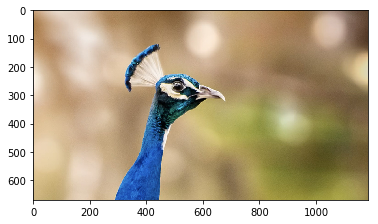

In [78]:
img = cv2.imread('blur.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display(img)

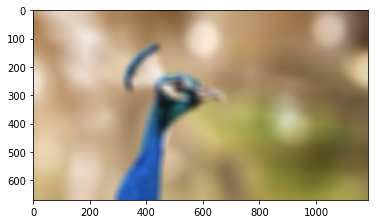

In [79]:
blured = cv2.blur(img, (30, 30)) # стандартный метод сглаживания изображения
display(blured)

На изображении снижу можно увидеть, что фильтр сгладил сам объект и его края довольно сильно. То есть мы получили изображение в расфокусе, а не повысили четкость.

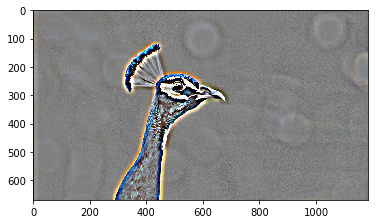

In [80]:
display_subdiv(img,blured,3)

Как мы видим выше, Мы потеряли очень сильно в детализации.

**bilateral фильтр** также "сглаживает"(убирает шумы) изображение, но и повышает контрастность на краях объекта.

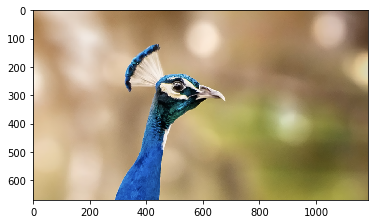

In [86]:
bltrl_image = cv2.bilateralFilter(img,15,10,10)
display(bltrl_image)

Как мы видим применение фильтра равномерно по всему изображению и похожа на шум получаемый из-за несовершенства фототехники

То есть мы убрали шум, при этом сохранили края у объектов, что по сути и есть повышение четкости

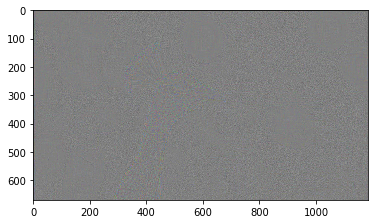

In [87]:
display_subdiv(img,bltrl_image,5)

Если же значения сигм будут очень велики то мы рискуем потерять в четкости, как следствие и в детализации

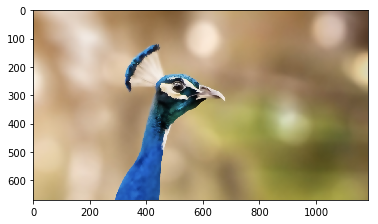

In [83]:
bltrl_image = cv2.bilateralFilter(img,15,100,100)
display(bltrl_image)

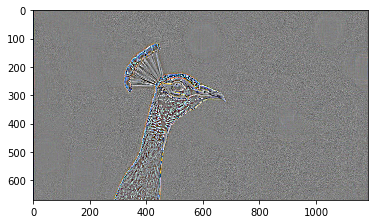

In [85]:
display_subdiv(img,bltrl_image,5)